# Fast F1 to Analyse Data

Complete Documentation  --->  https://theoehrly.github.io/Fast-F1/index.html

# Introduction:


° Getting started with the basics

° Loading a session

° Loading a session by name

° Working with laps and lap times

° Example Plot


FastF1 is largely built ontop of Pandas DataFrames and Series. But It adds its own convenient methods for working specifically with F1 data. This makes it much easier to get started and work with the data in general. Still, you have all the capabilities of Pandas at hand whenever you need them.

In [2]:
import fastf1 as ff1
import pandas as pd

# Enable the cache
ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 

In [3]:
monza_quali = ff1.get_session(2021, 'Monza' , 'Q')
leclerc = monza_quali.get_driver('LEC')

print("Ok %s, gli stai dando 3/4 decimi a settore quindi ... No need to push" %leclerc.name)

Ok Charles, gli stai dando 3/4 decimi a settore quindi ... No need to push


For some more advanced stuff, it’s just a few more steps.

core           INFO 	Loading laps for Italian Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '77', '11', '31', '4', '63', '33', '88', '55', '6', '99', '3', '16', '44', '47', '9', '10', '14', '18', '22']


<function matplotlib.pyplot.show(close=None, block=None)>

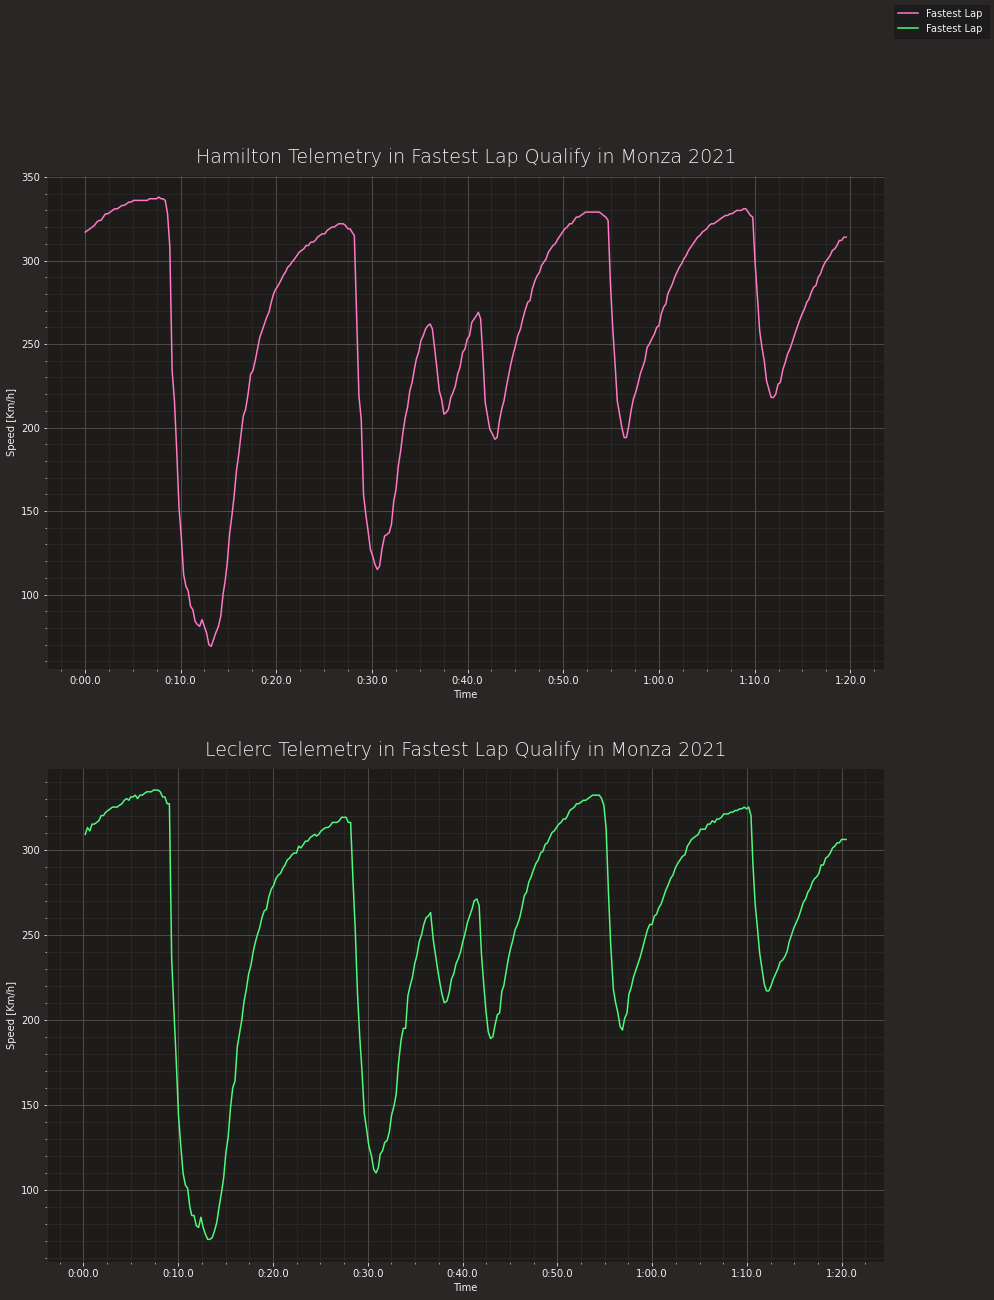

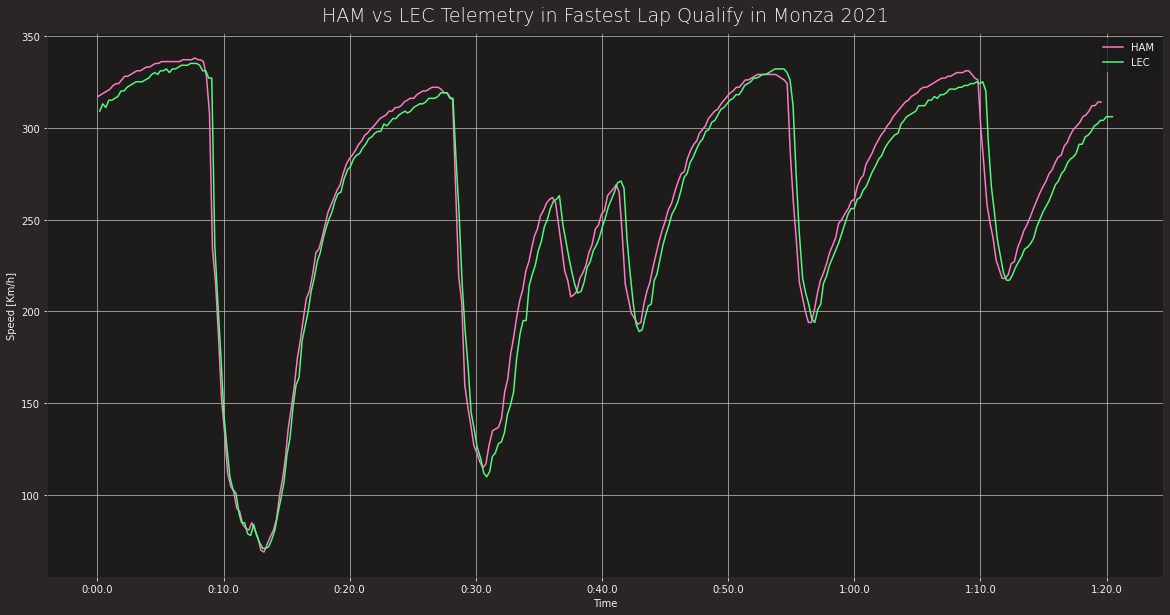

In [8]:
from matplotlib import pyplot as plt
from fastf1 import plotting

ff1.plotting.setup_mpl()

laps = monza_quali.load_laps(with_telemetry=True)

fast_hamilton = laps.pick_driver('HAM').pick_fastest()
ham_car_data = fast_hamilton.get_car_data()
time_h = ham_car_data['Time']
vCar_h = ham_car_data['Speed']


fast_leclerc = laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
time_l = lec_car_data['Time']
vCar_l = lec_car_data['Speed']



# The rest is just plotting



fig, ax = plt.subplots(nrows=2 , ncols=1 , figsize=(15,20))

ax[0].plot(time_h, vCar_h, label='Fastest Lap')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Speed [Km/h]')
ax[0].set_title('Hamilton Telemetry in Fastest Lap Qualify in Monza 2021' )

ax[1].plot(time_l, vCar_l, label='Fastest Lap ' , c='C1')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Speed [Km/h]')
ax[1].set_title('Leclerc Telemetry in Fastest Lap Qualify in Monza 2021')


fig.legend()

plt.figure(figsize=(20,10))
plt.plot(time_h, vCar_h, label='HAM')
plt.plot(time_l, vCar_l, label='LEC' , c='C1')
plt.xlabel('Time')
plt.ylabel('Speed [Km/h]')
plt.title('HAM vs LEC Telemetry in Fastest Lap Qualify in Monza 2021')
plt.grid()
plt.legend()

plt.show





In [44]:
weekend = ff1.get_session(2020, 'Belgian')
quali = weekend.get_quali() # Q Session
race = weekend.get_race() # R Session


laps = quali.load_laps(with_telemetry=True)

bottas=laps.pick_driver('BOT')
versby = laps.pick_driver('VER')

d={'BOT LapTime': bottas['LapTime'] , 'VER LapTime' : versby['LapTime']}
dataset_times=pd.DataFrame(data=d )

#display(dataset_times)

bottas.head()


core           INFO 	Loading laps for Belgian Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '5', '6', '18', '63', '3', '8', '77', '23', '44', '11', '10', '16', '31', '99', '26', '33', '7', '20', '55']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
62,0 days 00:22:30.264000,77,NaT,1,1,0 days 00:19:58.517000,NaT,NaT,0 days 00:01:07.104000,0 days 00:00:50.828000,...,193.0,SOFT,1.0,True,0 days 00:19:58.517000,Mercedes,BOT,1,False,2020-08-29 13:04:58.549
63,0 days 00:24:12.798000,77,0 days 00:01:42.534000,2,1,NaT,NaT,0 days 00:00:30.760000,0 days 00:00:43.163000,0 days 00:00:28.611000,...,305.0,SOFT,2.0,True,0 days 00:22:30.264000,Mercedes,BOT,1,True,2020-08-29 13:07:30.296
64,0 days 00:26:25.547000,77,0 days 00:02:12.749000,3,2,NaT,0 days 00:26:21.093000,0 days 00:00:35.853000,0 days 00:00:56.935000,0 days 00:00:39.961000,...,254.0,SOFT,1.0,True,0 days 00:24:12.798000,Mercedes,BOT,1,False,2020-08-29 13:09:12.830
65,0 days 00:32:48.370000,77,NaT,4,2,0 days 00:30:15.261000,NaT,NaT,0 days 00:01:03.471000,0 days 00:00:59.727000,...,244.0,SOFT,5.0,False,0 days 00:26:25.547000,Mercedes,BOT,1,False,2020-08-29 13:11:25.579
66,0 days 00:34:48.702000,77,0 days 00:02:00.332000,5,3,NaT,0 days 00:34:44.523000,0 days 00:00:31.006000,0 days 00:00:49.532000,0 days 00:00:39.794000,...,302.0,SOFT,4.0,False,0 days 00:32:48.370000,Mercedes,BOT,2,False,2020-08-29 13:17:48.402


In [43]:
lap=laps.pick_fastest()
lap['LapStartTime']

lap.get_weather_data()

Time             0 days 01:14:15.739000
AirTemp                            16.3
Humidity                           62.7
Pressure                          957.7
Rainfall                           True
TrackTemp                          23.7
WindDirection                       136
WindSpeed                           1.0
Name: 74, dtype: object

In [59]:
ham= race.get_driver('HAM')
display(ham.info)

{'number': '44',
 'position': '1',
 'positionText': '1',
 'points': '25',
 'Driver': {'driverId': 'hamilton',
  'permanentNumber': '44',
  'code': 'HAM',
  'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton',
  'givenName': 'Lewis',
  'familyName': 'Hamilton',
  'dateOfBirth': '1985-01-07',
  'nationality': 'British'},
 'Constructor': {'constructorId': 'mercedes',
  'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One',
  'name': 'Mercedes',
  'nationality': 'German'},
 'grid': '1',
 'laps': '44',
 'status': 'Finished',
 'Time': {'millis': '5048761', 'time': '1:24:08.761'},
 'FastestLap': {'rank': '2',
  'lap': '28',
  'Time': {'time': '1:47.758'},
  'AverageSpeed': {'units': 'kph', 'speed': '233.990'}}}

# Utilities

Here is an example that compares the quickest laps of Leclerc and Hamilton from Bahrain 2021 Qualifying:

core           INFO 	Loading laps for Emilia Romagna Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '5', '6', '63', '18', '22', '3', '77', '9', '47', '44', '11', '10', '16', '31', '99', '14', '33', '7', '55']


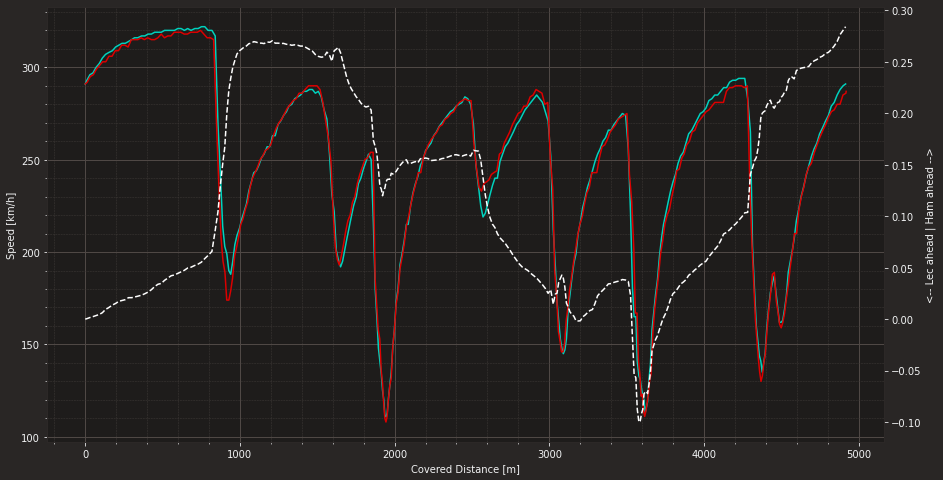

In [68]:
from fastf1 import utils


plotting.setup_mpl()

quali = ff1.get_session(2021, 'Emilia Romagna', 'Q')
laps = quali.load_laps(with_telemetry=True)
lec = laps.pick_driver('LEC').pick_fastest()
ham = laps.pick_driver('HAM').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ham, lec)

# ham is reference, lec is compared

fig, ax = plt.subplots(figsize=(15,8))

# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling

ax.plot(ref_tel['Distance'], ref_tel['Speed'], color=plotting.team_color(ham['Team']))

ax.plot(compare_tel['Distance'], compare_tel['Speed'], color=plotting.team_color(lec['Team']))
ax.set_xlabel("Covered Distance [m]")
ax.set_ylabel("Speed [km/h]")


twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Lec ahead | Ham ahead -->")
plt.show()

inject_driver_ahead() adds ‘DriverAhead’ and ‘DistanceToDriverAhead’ to the position data for all laps of all drivers. 

This functionality has been replaced with fastf1.core.Telemetry.add_driver_ahead(). The new implementation provides smoother and more accurate results. Additionally, it can be applied to arbitrary slices of data. But it suffers from integration error when used over multiple laps. The legacy implementation has no integration error issues.

It is recommended to use the new version. If necessary, it should be applied lap by lap and the lap data should be concatenated afterwards. Still, the old version can be used if so desired.

The following is an example comparison plot of the legacy version and the new version. It also shows how the two versions can be used.



core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '5', '6', '18', '63', '3', '8', '77', '23', '44', '11', '10', '16', '31', '99', '26', '33', '7', '20', '55']


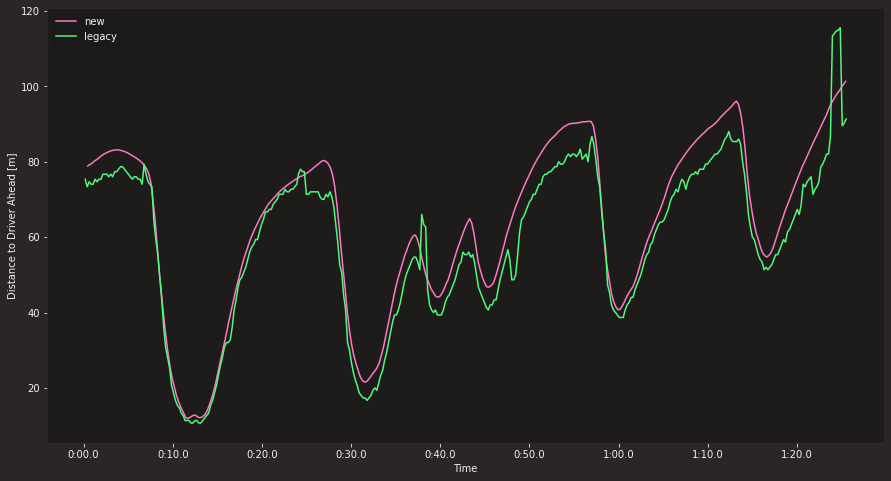

In [69]:
import numpy as np

ff1.plotting.setup_mpl()


session = ff1.get_session(2020, 'Italy', 'R')
laps = session.load_laps(with_telemetry=True)

DRIVER = 'VER'  # which driver; need to specify number and abbreviation
DRIVER_NUMBER = '33'
LAP_N = 10  # which lap number to plot

drv_laps = laps.pick_driver(DRIVER)
drv_lap = drv_laps[(drv_laps['LapNumber'] == LAP_N)]  # select the lap


# create a matplotlib figure
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

# ############### new
df_new = drv_lap.get_car_data().add_driver_ahead()
ax.plot(df_new['Time'], df_new['DistanceToDriverAhead'], label='new')

# ############### legacy
df_legacy = ff1.legacy.inject_driver_ahead(session)[DRIVER_NUMBER].slice_by_lap(drv_lap)
ax.plot(df_legacy['Time'], df_legacy['DistanceToDriverAhead'], label='legacy')

ax.set_xlabel("Time")
ax.set_ylabel("Distance to Driver Ahead [m]")

plt.legend()
plt.show()

In [75]:
session = ff1.get_session(2020, 4, 'Q')
laps = session.load_laps(with_telemetry=True)
fastest_lap = laps.pick_fastest()
tel = fastest_lap.telemetry

# use padding so that there are values outside of the desired range for accurate interpolation later
car_data = fastest_lap.get_car_data(pad=1, pad_side='both')
pos_data = fastest_lap.get_pos_data(pad=1, pad_side='both')

# do calculations here
# ...
# ...

merged_data = car_data.merge_channels(pos_data)

# slice again to remove the padding and interpolate the exact first and last value
merged_data = merged_data.slice_by_lap(fastest_lap, interpolate_edges=True)

core           INFO 	Loading laps for British Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '5', '6', '18', '63', '3', '8', '77', '23', '44', '27', '10', '16', '31', '99', '26', '33', '7', '20', '55']


## Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.

In [8]:
import fastf1 as ff1
import pandas as pd

# Enable the cache
ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
from matplotlib import pyplot as plt
from fastf1 import plotting
ff1.plotting.setup_mpl()

# load a session and its telemetry data
quali = ff1.get_session(2020, 'Italy', 'Q')
laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Italian Grand Prix - Qualifying [v2.1.12]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 26: Ignoring late data for a previously processed lap.The data may contain errors (previous: 13; current 14)
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has

In [9]:
#First, we select the two laps that we want to compare

ver_lap = laps.pick_driver('VER').pick_fastest()
ham_lap = laps.pick_driver('HAM').pick_fastest()

Next we get the telemetry data for each lap. We also add a ‘Distance’ column to the telemetry dataframe as this makes it easier to compare the laps.

In [10]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

Finally, we create a plot and plot both speed traces. We color the individual lines with the driver’s team colors.

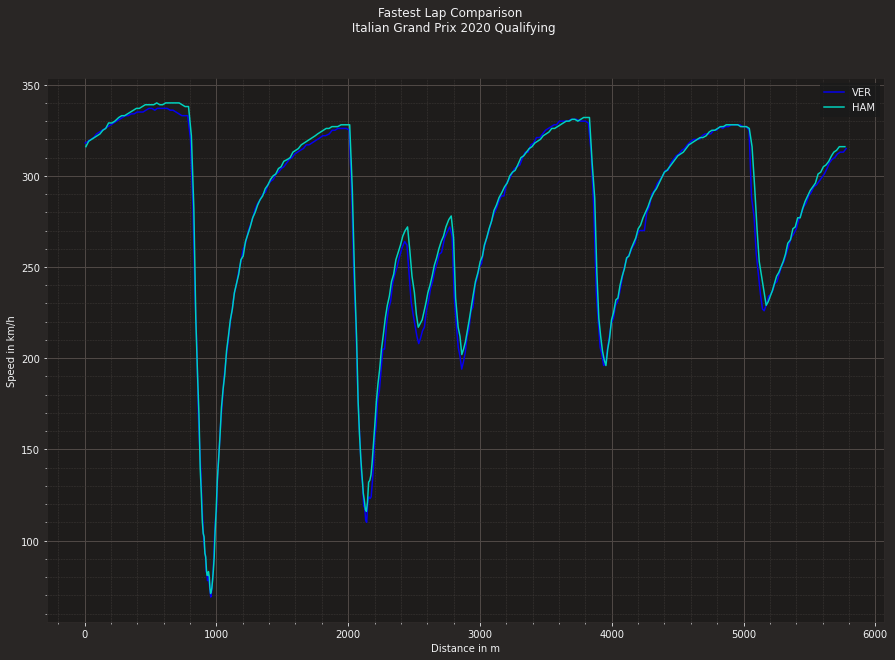

In [14]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

fig, ax = plt.subplots(figsize=(15,10) )
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{quali.weekend.name} {quali.weekend.year} Qualifying")

plt.show()

## Gear shifts on track

Plot which gear is being used at which point of the track

Import FastF1 and load the data

In [16]:
import fastf1 as ff1
import pandas as pd

# Enable the cache
ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
from matplotlib import pyplot as plt
from fastf1 import plotting

ff1.plotting.setup_mpl()

from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


In [18]:
session = ff1.get_session(2021, 'Austrian Grand Prix', 'Q')
laps = session.load_laps(with_telemetry=True)

lap = laps.pick_fastest()
tel = lap.get_telemetry()

core           INFO 	Loading laps for Austrian Grand Prix - Qualifying [v2.1.12]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load driver list
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track 

Prepare the data for plotting by converting it to the appropriate numpy data types

In [19]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

Create a line collection. Set a segmented colormap and normalize the plot to full integer values of the colormap

In [28]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

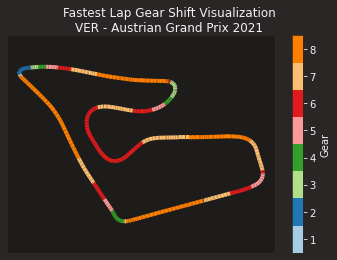

In [29]:
#Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.weekend.name} {session.weekend.year}")

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they are centered for each color segment.

## Qualifying results overview

Plot the qualifying result with visualization the fastest times.

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps


ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 


# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

quali = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
laps = quali.load_laps()

core           INFO 	Loading laps for Spanish Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '16', '55', '77', '4', '10', '3', '7', '11', '14', '22', '31', '18', '63', '99', '5', '6', '47', '9']


First, we need to get an array of all drivers.

In [48]:
drivers = pd.unique(laps['Driver'])
print(drivers)

['VER' 'HAM' 'LEC' 'SAI' 'BOT' 'NOR' 'GAS' 'RIC' 'RAI' 'PER' 'ALO' 'TSU'
 'OCO' 'STR' 'RUS' 'GIO' 'VET' 'LAT' 'MSC' 'MAZ']


After that we’ll get each drivers fastest lap, create a new laps object from these laps, sort them by lap time and have pandas reindex them to number them nicely by starting position.

In [49]:
list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
    
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

The plot is nicer to look at and more easily understandable if we just plot the time differences. Therefore we subtract the fastest lap time from all other lap times.

In [50]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

We can take a quick look at the laps we have to check if everything looks all right. For this, we'll just check the 'Driver', 'LapTime' and 'LapTimeDelta' columns.

In [51]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.669000 0 days 00:00:00.928000
8     NOR 0 days 00:01:17.696000 0 days 00:00:00.955000
9     ALO 0 days 00:01:17.966000 0 days 00:00:01.225000
10    STR 0 days 00:01:17.974000 0 days 00:00:01.233000
11    GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
12    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    RUS 0 days 00:01:18.445000 0 days 00:00:01.704000
15    TSU 0 days 00:01:18.556000 0 days 00:00:01.815000
16    RAI 0 days 00:01:18.917000 0 days 00:00:02

Finally, we'll create a list of team colors per lap to color our plot.

In [52]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

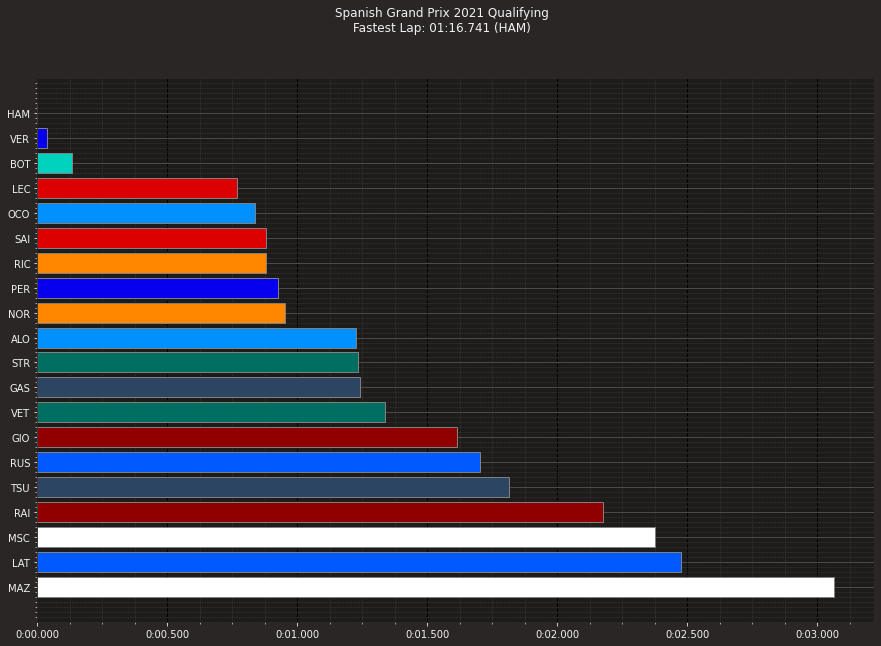

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{quali.weekend.name} {quali.weekend.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()